In [2]:
# library import
import pandas as pd
import yaml
import seaborn as sn
import requests
import matplotlib.pyplot as plt

In [4]:
# import parameters data
"""
Import the parameters of hospitalization and mortality by state using data from the CoronaCidades
"""

data_parameters = pd.read_csv("http://datasource.coronacidades.org/br/states/parameters")

In [7]:
# import farolcovid data
"""
Imports FarolCovid data related to:

- Updated cases and deaths
- Notification rate and most recent estimated active cases
- Most recent contagion rate (Rt)
- Latest number of sick and ICU beds from CNES
"""

df_farol = pd.read_csv("http://datasource.coronacidades.org/br/states/farolcovid/main")

In [8]:
# selecting the variables for the correlation analyses and creating one single dataframe

df_data_parameters = data_parameters[["state_num_id","fatality_ratio", "hospitalized_by_age_perc", "i1_percentage", "i2_percentage", "i3_percentage", "data_last_refreshed"]]

df_farol_data = df_farol[["state_num_id","last_updated_cases", "confirmed_cases", "deaths", 
          "notification_rate", "active_cases", "rt_most_likely", 
          "number_beds", "number_icu_beds", "last_updated_number_beds"]]

data = pd.merge(df_farol_data, df_data_parameters, on='state_num_id')

In [13]:
# correlation matriz analyzes
"""
Correlation calculation for statistical association, in order to determine the linearity or non-linearity relationship between the variables of the datasets used
"""

correlation = data.corr()

<AxesSubplot:>

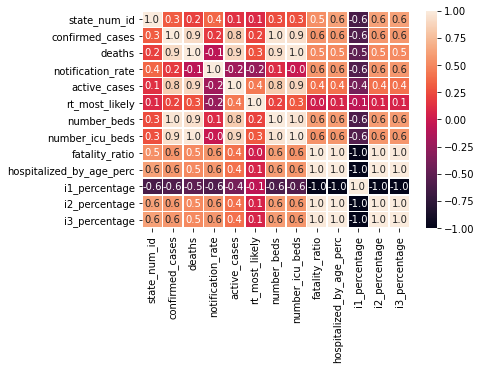

In [15]:
#correlation plot
"""
Correlation matrix plotting as a heatmap
"""

plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot